### Theory of ML - Homework 2 


# Problem1
(Loss minimization vs. misclassification)
Consider the case d = 1 and implement gradient descent for minimizing L(w). First consider a simple “well separable” case with 100 data points (and labels) as follows:
(−50,−1), (−49,−1), ..., (−1,−1), (1,1), (2,1), ..., (50,1). Initialize w = −1 and run 100 iterations of gradient descent.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp
import math

In [35]:
def gradient_1(w, x,y):
  grad = 0
  denom = (1 + math.exp(-1 * x * y * w))
  grad += (-1 * x * y) * math.exp(-1 * x * y * w) / denom
  return grad

In [36]:
def loss_fucntion(w, x,y):
  loss = 0
  exp_val = (-1 * x * y * w)
  loss += math.log(1 + math.exp(-1 * x * y * w))
  return loss

In [55]:
def gradient_descent(start, lr, n_iter, datax,datay):
  vector = start
  for i in range(n_iter):
    for x in datax:
      for y in datay:
        diff = -lr * gradient_1(vector, x,y)
        # print("diff", diff)
        vector += diff
        # print("loss at {}:{}".format(i, loss_fucntion(vector, x[0],x[1])))
  return vector

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note lin

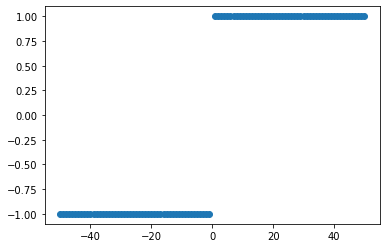

In [52]:
x1 = np.linspace(-50, -1, 50)
x2 = np.linspace(1, 50, 50)
x= np.concatenate((x1,x2))
y1= np.full(shape=50,fill_value=-1,dtype=np.int)
y2= np.full(shape=50,fill_value=1,dtype=np.int)
y= np.concatenate((y1,y2))
plt.plot(x,y,'o')
plt.show()

In [56]:
omega = gradient_descent(start=-1, lr=0.0001, n_iter=100, datax=x,datay=y)

In [57]:
print("Final omega:",omega)

Final omega: 0.04300309197099269


Now suppose we “corrupt” some labels. Specifically, take the 10 points with the highest abso- lute value of x (i.e., 50, −50, 49, −49, ..., 46, −46) and reverse the sign of their labels. Now show the result of performing gradient descent, and interpret your result. (Note that we only corrupted 10% of the labels.)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depreca

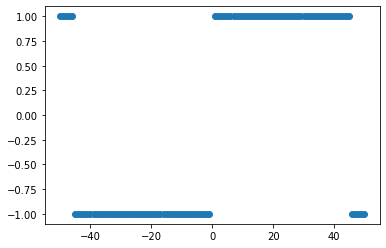

In [58]:
x_corrupt= x
y1= np.full(shape=5,fill_value=1,dtype=np.int)
y2= np.full(shape=45,fill_value=-1,dtype=np.int)
y3= np.full(shape=45,fill_value=1,dtype=np.int)
y4=np.full(shape=5,fill_value=-1,dtype=np.int)
y_corrupt= np.concatenate((y1,y2,y3,y4))
plt.plot(x_corrupt,y_corrupt,'o')
plt.show()

In [59]:
omega_corrupted = gradient_descent(start=-1, lr=0.0001, n_iter=100, datax=x_corrupt,datay=y_corrupt)

In [60]:
print("Final omega with corrupted points:",omega_corrupted)

Final omega with corrupted points: 0.01962220421419022


Now show the result of performing gradient descent, and interpret your result. 

Answer: Gradient descent is optimizing to local minima in both the cases. 

# Problem3

Create a ‘random’ dataset for this problem as follows. Set n = 500, m = 2n, and let A have entries that are random in the interval [−1, 1]. Now choose some “hidden” vector x∗ (entries again random in [−1, 1]), and define b as Ax∗ + η, where η is a vector whose coordinates are Gaussian with mean 0 and variance 0.5.

In [10]:
import random
import math
import time
import numpy as np


In [11]:
def create_data(M,N):
  A = np.random.uniform(-1.0,1.0,size=(M,N))
  x = np.random.uniform(-1.0,1.0,size=(N,1))
  n = np.random.normal(loc=0.0, scale=math.sqrt(0.5), size=1000).reshape(M,1)
  b = np.zeros((1000,1))
  b = np.dot(A,x)+n
  return A,x,n,b

In [12]:
N=500
M=2*N
A,x,n,b=create_data(M,N)

In [13]:
n.shape,x.shape,A.shape

((1000, 1), (500, 1), (1000, 500))

Run gradient descent with a constant stepsize (say 1/10) starting with x0 = 0, and report the function value and the distance to the ‘hidden’ x∗ after 50 steps.


In [14]:
def gradient_3(x):
  return 2*np.dot(np.transpose(A), np.subtract(np.dot(A,x),b))

In [15]:
def gradient_descent( start, lr, iter):
    weight = start
    for _ in range(iter):
      diff = -lr * gradient_3(weight)
      # print(diff)
      weight+= diff
    return weight

In [16]:
start = np.zeros(x.shape)

In [17]:
time_zero=time.time()
func_val= gradient_descent(start,0.1,50)
time_gradient=time.time()
time_gradient-=time_zero
time_gradient

0.12498998641967773

We see that the gradient keeps oscillating. The reason is that we started at (0,0) which is already close to the minimum and in the first iteration, since the gradient is huge(because of large learning rate) it takes omega to a far away point which might take more iterations to optimize to minimum point. 

In [18]:
print("Distance of gradient descent:",np.linalg.norm(x-func_val))
print("Time for gradient descent:",time_gradient)

Distance of gradient descent: 4.6592214245212325e+113
Time for gradient descent: 0.12498998641967773


It is well known that least squares regression has a closed form, given by x∗ = (AT A)−1AT b. Using a numerical library for the inverse, compute x∗ using this formula. 

In [19]:
def closed_form(A,b):
  return np.dot(np.dot(np.linalg.inv(np.dot(A.transpose(),A)),A.transpose()),b) 

In [20]:
time_zero_closed=time.time()
cf = closed_form(A,b)
time_closed_form = time.time()
time_closed_form-=time_zero_closed
print("Distance of closed form:",np.linalg.norm(x-cf))
print("Time closed form:",time_closed_form)


Distance of closed form: 1.172030458408197
Time closed form: 0.2030324935913086


Compare the running time of this method to that of gradient descent in part (d).


In [21]:
running_time_difference= time_gradient-time_closed_form
running_time_difference

-0.07804250717163086


Answer: The running time of gradient descent is faster than the closed form computation  

#Problem 4

In [22]:
def get_data():
    data = []
    for i in range(100):
        a = (i/100)
        b = -1
        tup = (a, b)
        data.append(tup)
    for i in range(100):
        a = (i/100)
        b = 1
        tup = (a, b)
        data.append(tup)
    return data

In [23]:
def gradient_4(x, y, a, b, t,grad_type):
  if type=="sgd":
    eta = 0.1
  elif type=="t+1":
    eta= 0.1/(t+1)
  else: 
    eta= 0.1/math.sqrt(t+1)
  x_t = x * (1 - (2 * eta)) + 2 * eta * a
  y_t = y * (1 - (2 * eta)) + 2 * eta * b
  return x_t,y_t

In [24]:
def loss_function(x, y, data):
    value = 0
    for i in range(len(data)):
        value += pow(x - data[i][0], 2) + pow(y - data[i][1], 2)
    value = value / 400
    return value

In [25]:
def stochastic_gradient_descent(data, n_iter,grad_type):
    x = 1
    y = 1
    print("initial loss:", loss_function(x, y, data))
    for i in range(n_iter):
        random_num = random.randrange(0, 200)
        a_i = data[random_num][0]
        b_i = data[random_num][1]
        grad = gradient_4(x, y, a_i, b_i, i,grad_type)
        x = grad[0]
        y = grad[1]
        # print("loss at iter {}: {}".format(i, loss_function(grad[0], grad[1], data)))

    return grad

In [26]:
data=get_data()

In [27]:
stochastic_gradient_descent(data,200,grad_type="sgd")

initial loss: 1.169175


(0.5301493968392726, 0.24103243050221873)

In [28]:
stochastic_gradient_descent(data,200,grad_type="t+1")

initial loss: 1.169175


(0.5388909707276541, -0.0033693766499475093)

In [29]:
stochastic_gradient_descent(data,200,grad_type="sqrtt+1")

initial loss: 1.169175


(0.5048979874989314, 0.09840357617915674)

When the learning rate is reduced (by making it time dependent), we see a slower optimization to minima. 